# Cross calibration of all  beams

This notebook is a tutorial for demonstrating the functionality of the code for looking at cross calibration of all beams.

I am running it on happili-02 at the moment

This notebook is seriously updated 26 Feb 2019 to account for the restructuring of the cross-calibration code, based around the introduction of atdbquery for finding data (and better structure for getting data)



## Setup notebook and dependencies

In [4]:
#Load all magic and packaged needed
%matplotlib inline

import sys
sys.path.append('/home/adams/commissioning/crosscal')
import crosscal as cc

import apercal

print(apercal.__version__)
print(apercal.__file__)

2.3
/home/apercal/apercal/apercal/__init__.pyc


In [5]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

import matplotlib
matplotlib.matplotlib_fname()

[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg', u'agg', u'cairo', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']


u'/home/apercal/pipeline/local/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

## Setup logging

In [6]:
#start apercal logger, because I'll use apercal routines
#and may be helpful to have that record
#set up logging
%config IPCompleter.greedy=True
import apercal.libs.lib as lib
lib.setup_logger('info', logfile='/home/adams/commissioning/crosscal/log/ccal_tutorial.log')

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/commissioning/crosscal/log/ccal_tutorial.log


## Define global variables

In [7]:
basedir = '/data/adams/apertif/crosscal'

## Get dictionary of all calibrator switching scans

In [8]:
scandict = cc.get_switching_scan_dict()

Total number of results found in ATDB for IMAGING: 2227
Total number of results returned for IMAGING: 2227
Total time to run query: 13.41 sec
First scan, number in switch
181211025_3C147  40
181214019_3C147  39
190107022_3c147  40
190108010_3c147  41
190109021_3c147  40
190110029_3c147  38
190121017_3c147  39
190122015_3c147  40
190123008_3c147  39
190124029_3c147  39
190125019_3C48  39
190128002_3C286  75
190204015_3c147  39
190205015_3c147  38
190206020_3c147  40
190207019_3c147  40
190208028_3C48  42
190220013_3C147  40
190221011_3C147  40
190222017_3C48  47
190301020_3C147  40
190302027_CTD93  40
190302068_3C147  34
190303007_3C286  40
190303047_CTD93  39


## Get the calibrated data

In [9]:
#call a convenience function that copies, updates, flags and calibrates data
scanlist,beamlist = cc.get_cal_data(scandict,basedir,run=False,mode='single',scanset='190221011_3C147') #get last switching scan by default

In verification mode, will print commands to screen
Copying data
Moved to and copying data to /data/adams/apertif/crosscal/190221011/00/raw
python /home/adams/altadata/getdata_alta.py 190221 011-011 00-00
File already exists
In verification mode, no data copied, will skip remaining steps
Copying data
Moved to and copying data to /data/adams/apertif/crosscal/190221012/00/raw
python /home/adams/altadata/getdata_alta.py 190221 012-012 01-01
File already exists
In verification mode, no data copied, will skip remaining steps
Copying data
Moved to and copying data to /data/adams/apertif/crosscal/190221013/00/raw
python /home/adams/altadata/getdata_alta.py 190221 013-013 02-02
File already exists
In verification mode, no data copied, will skip remaining steps
Copying data
Moved to and copying data to /data/adams/apertif/crosscal/190221014/00/raw
python /home/adams/altadata/getdata_alta.py 190221 014-014 03-03
File already exists
In verification mode, no data copied, will skip remaining steps


## Plot bandpass amplitude

In [10]:
#first initialize the object
bp190221011 = cc.BPSols('3C147','/data/adams/apertif/crosscal',scanlist,beamlist)

In [11]:
#then get the data
bp190221011.get_data()

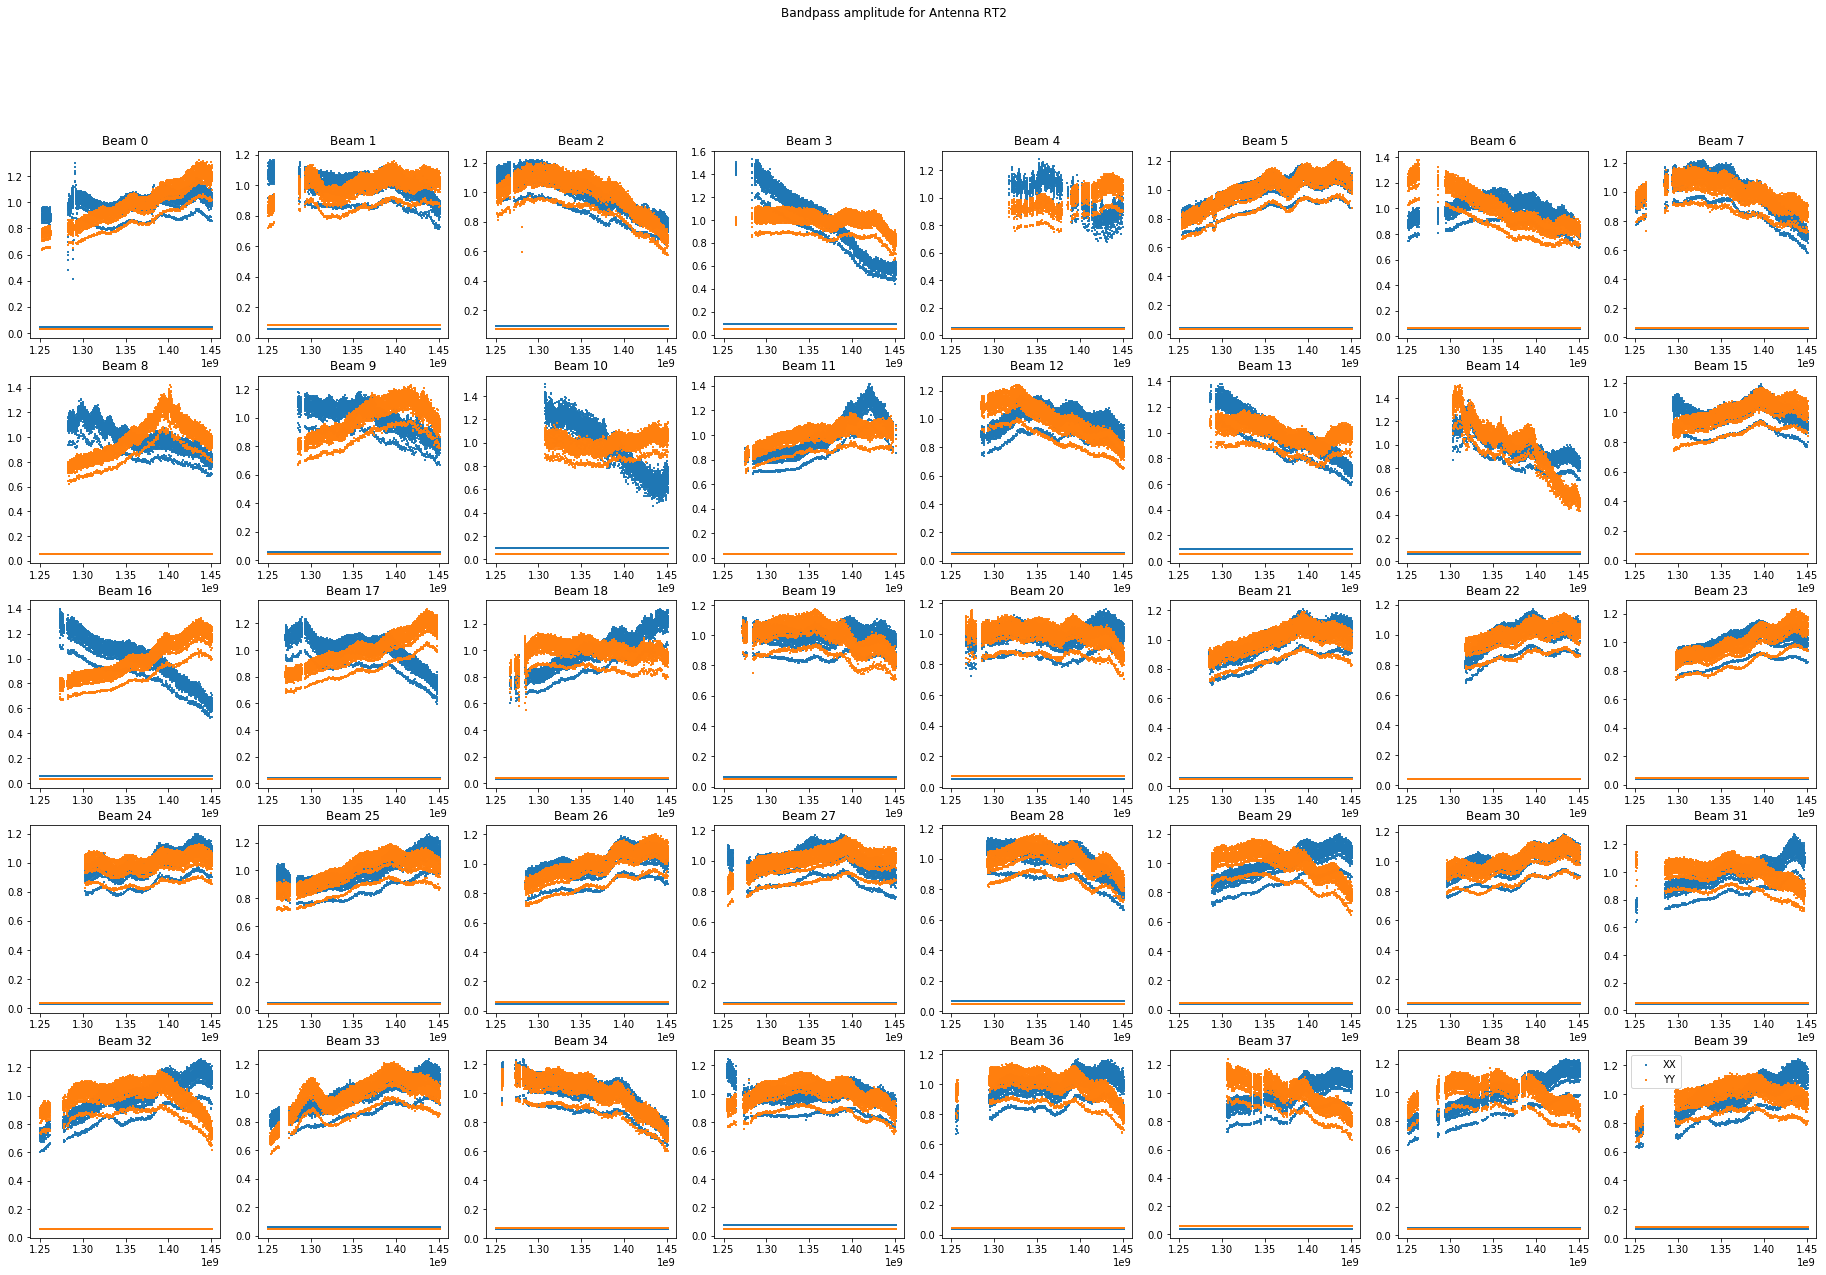

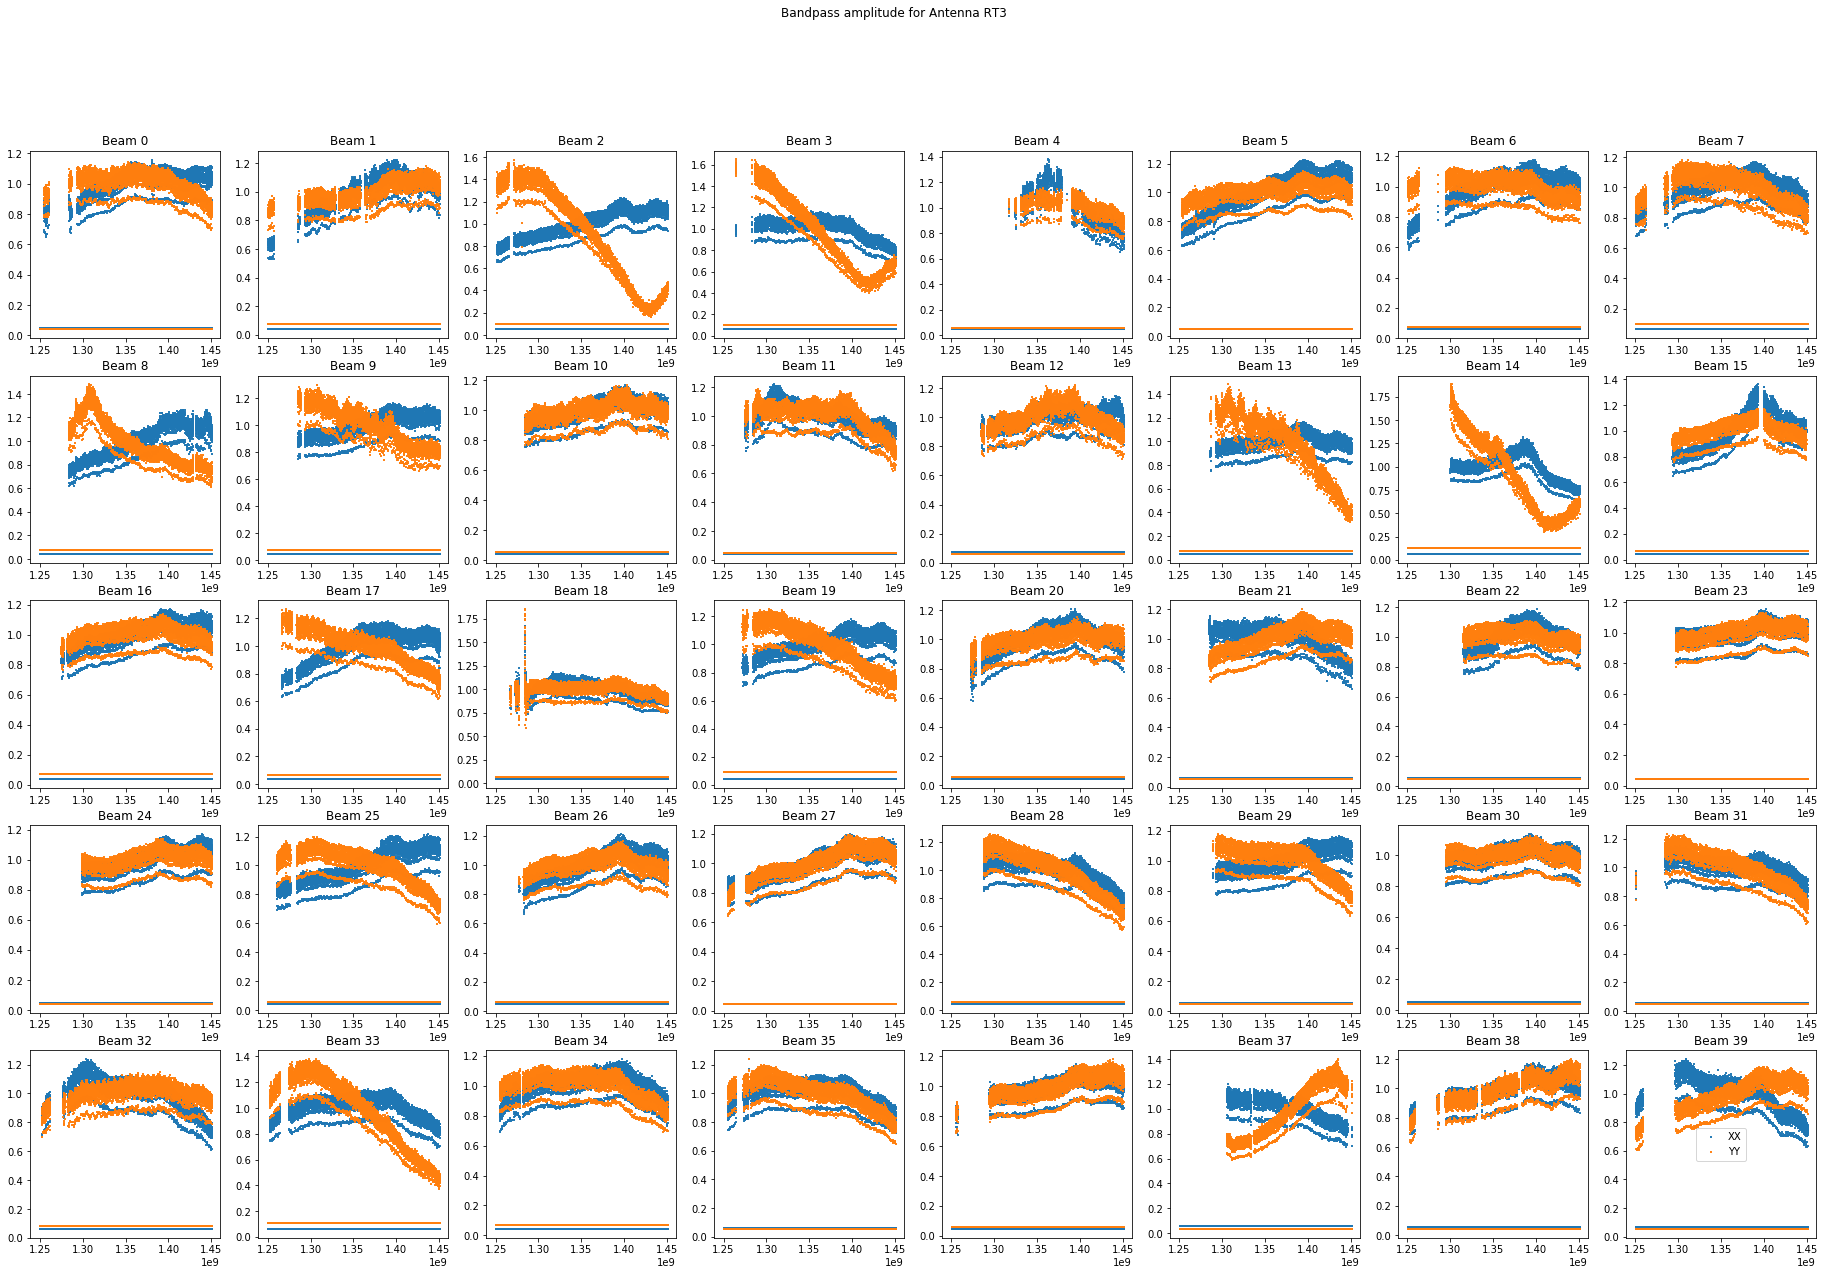

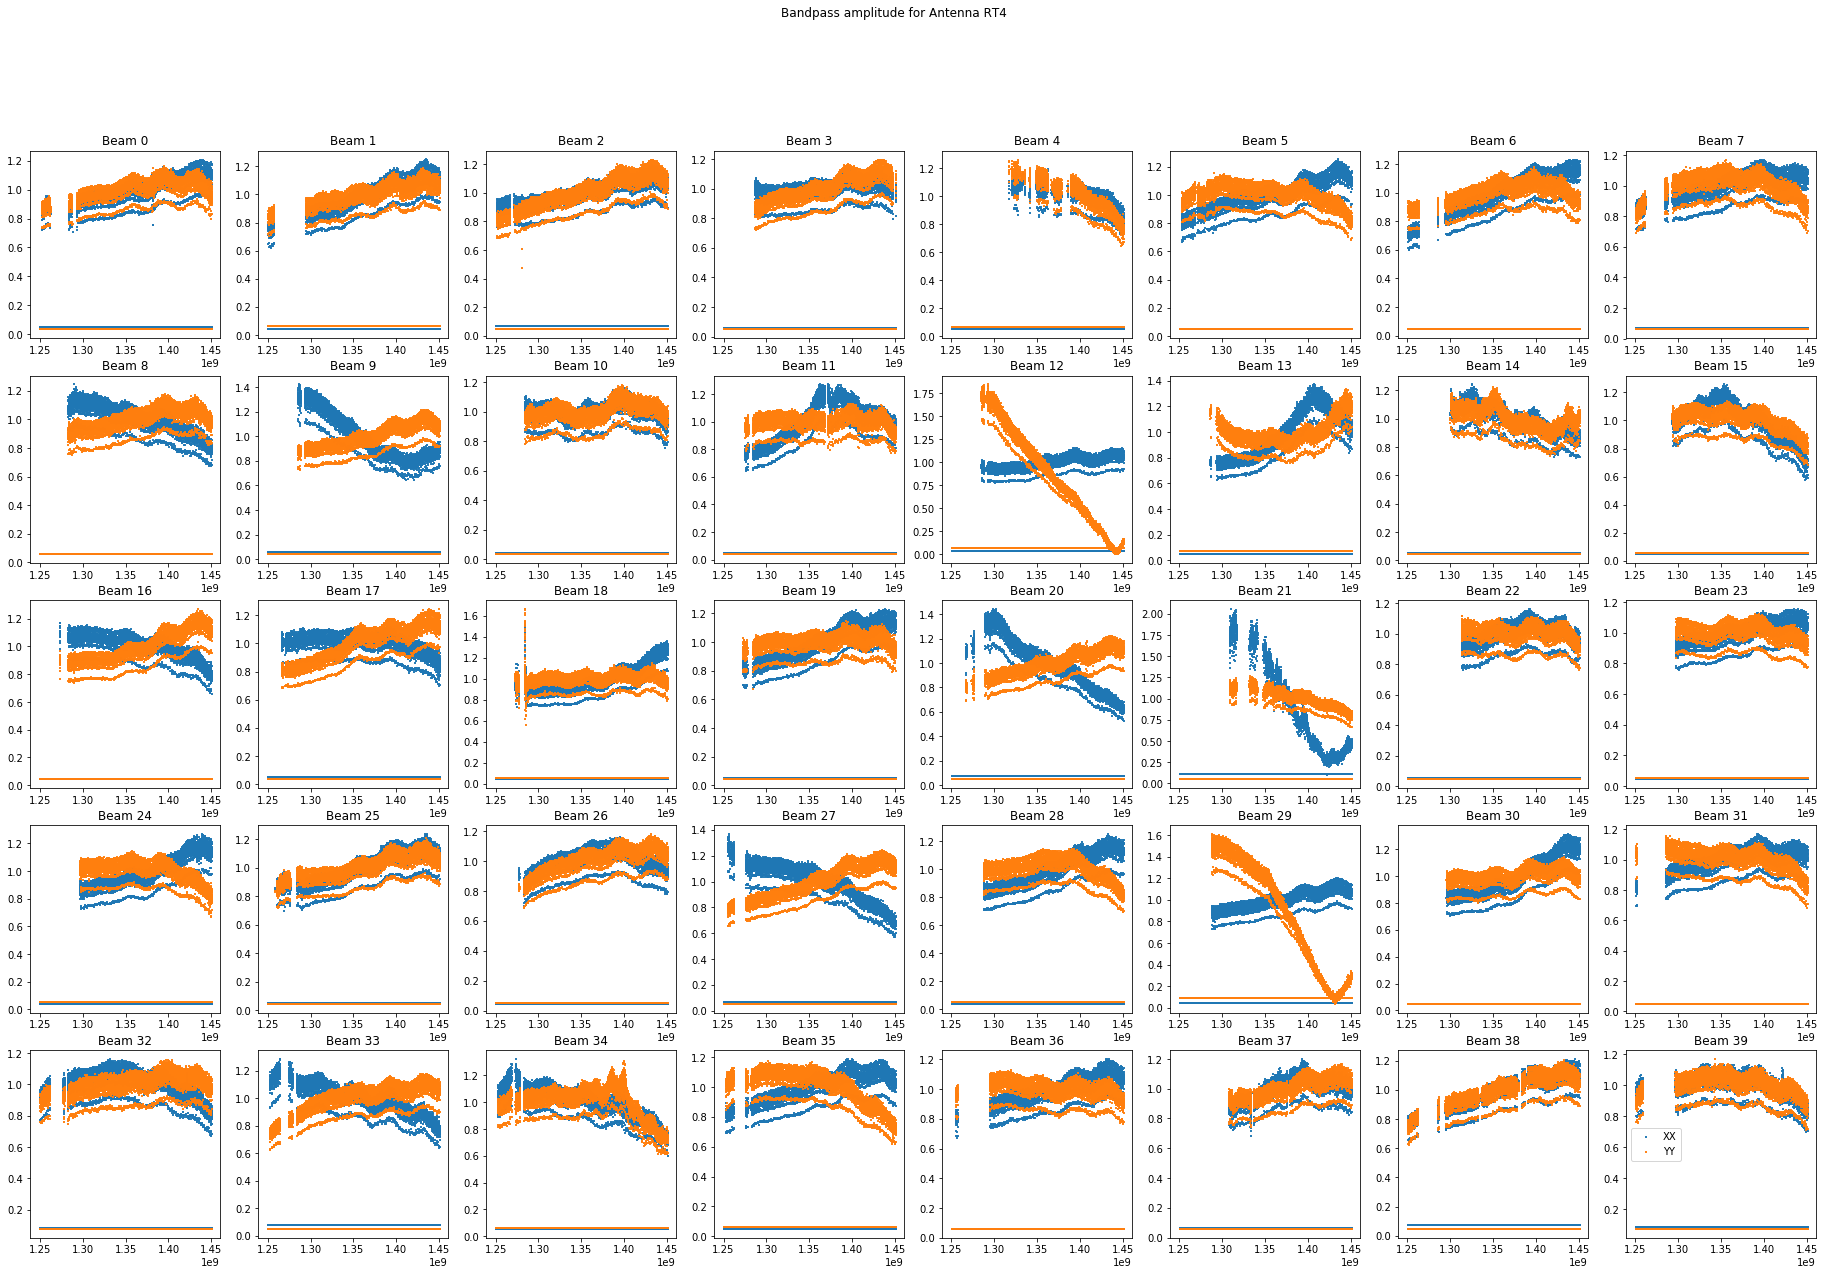

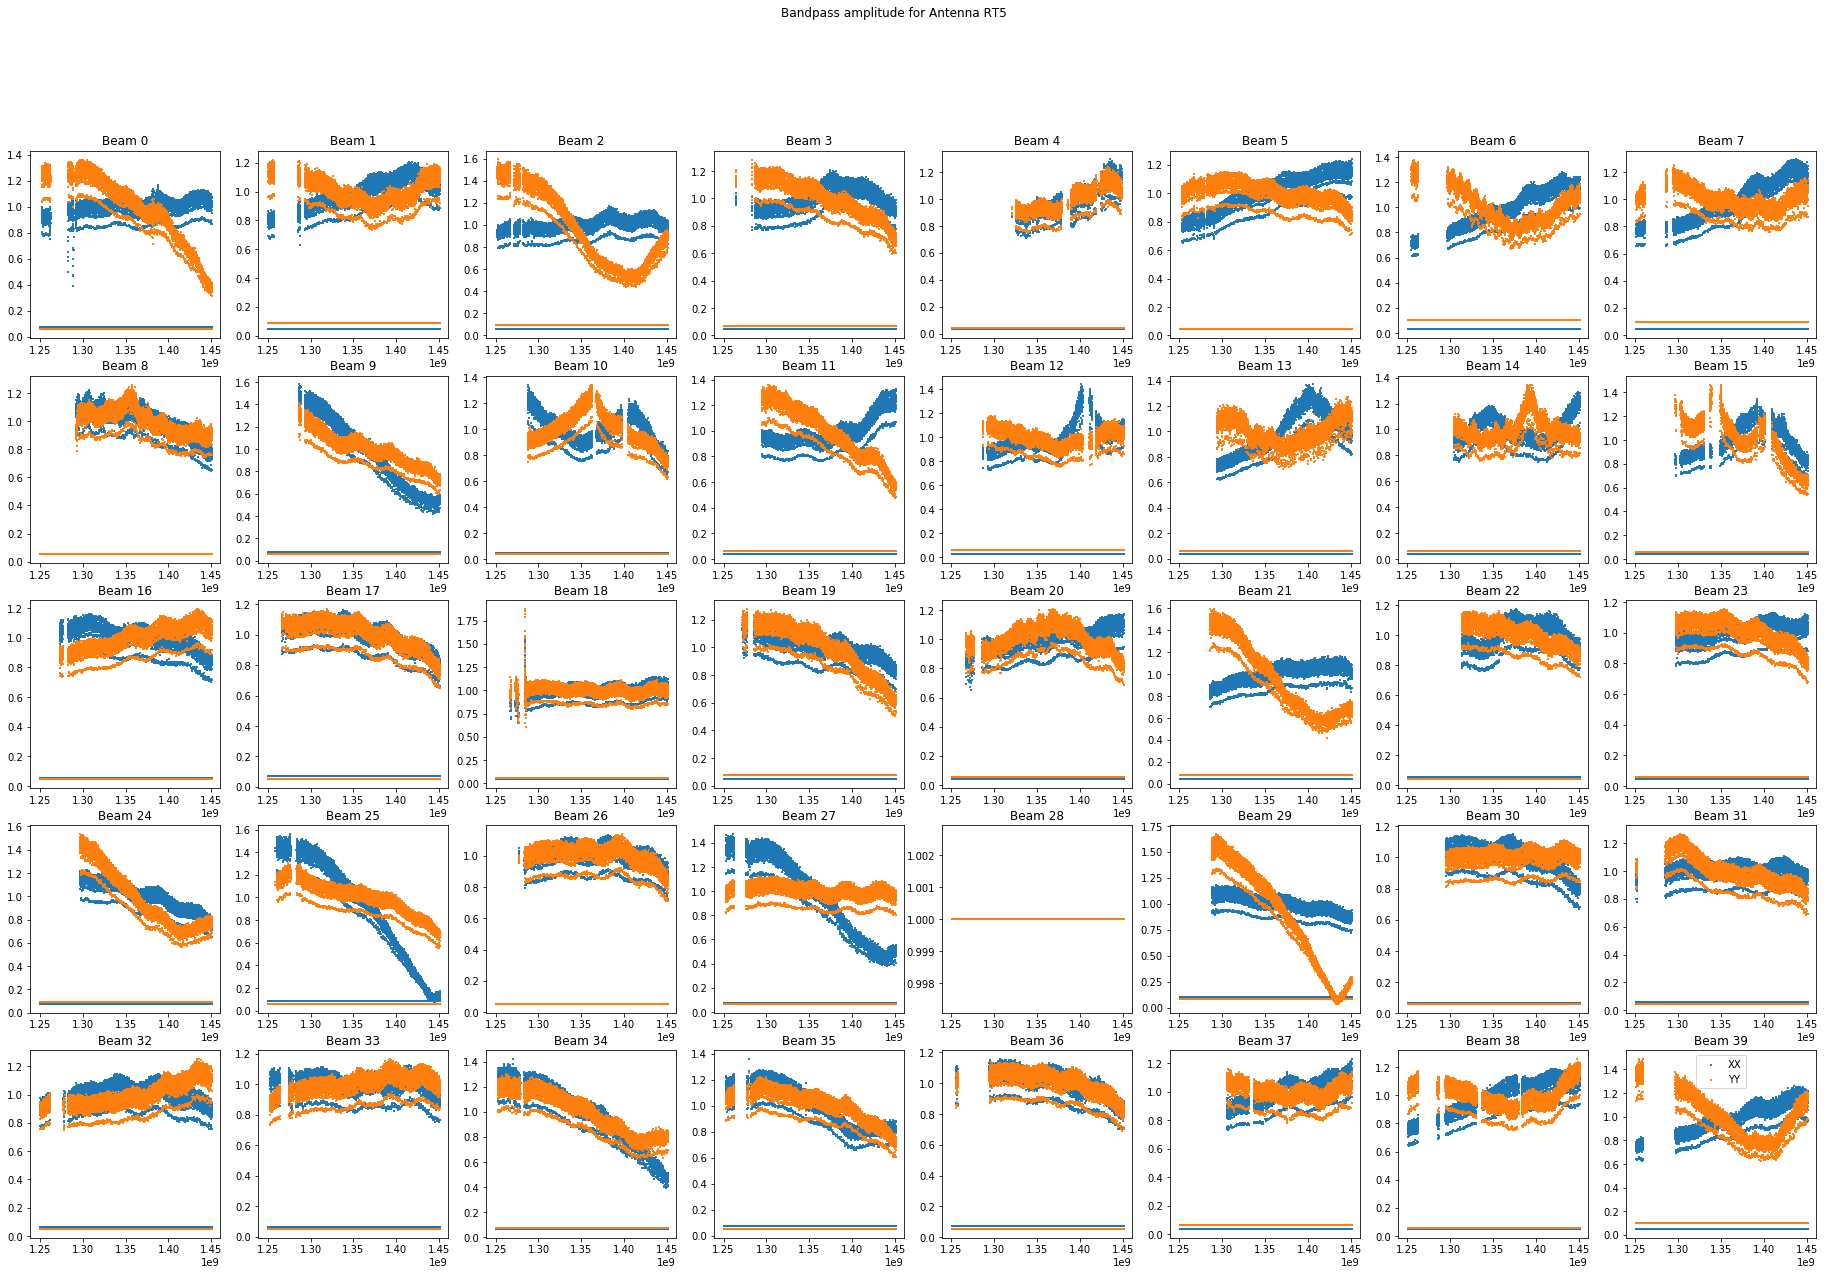

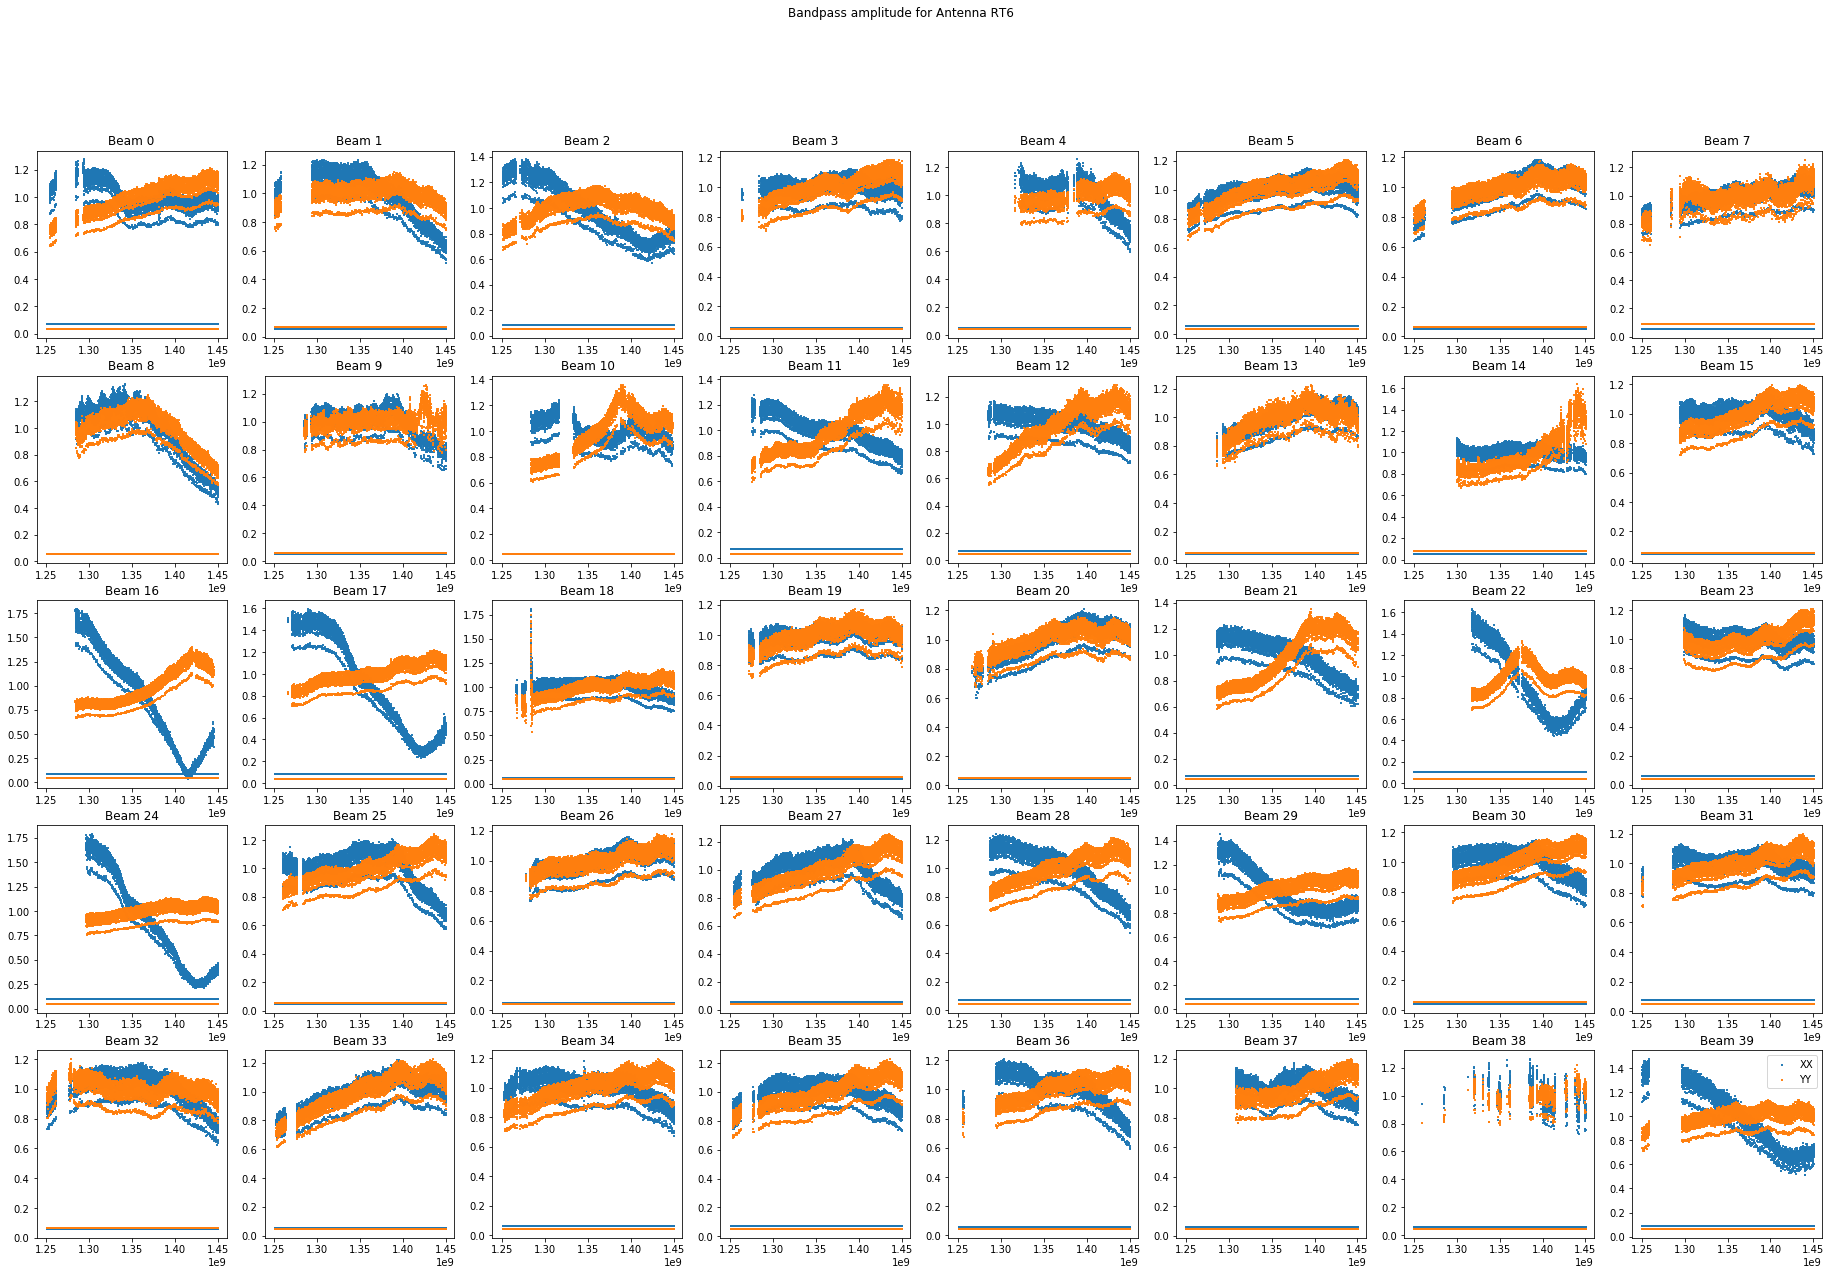

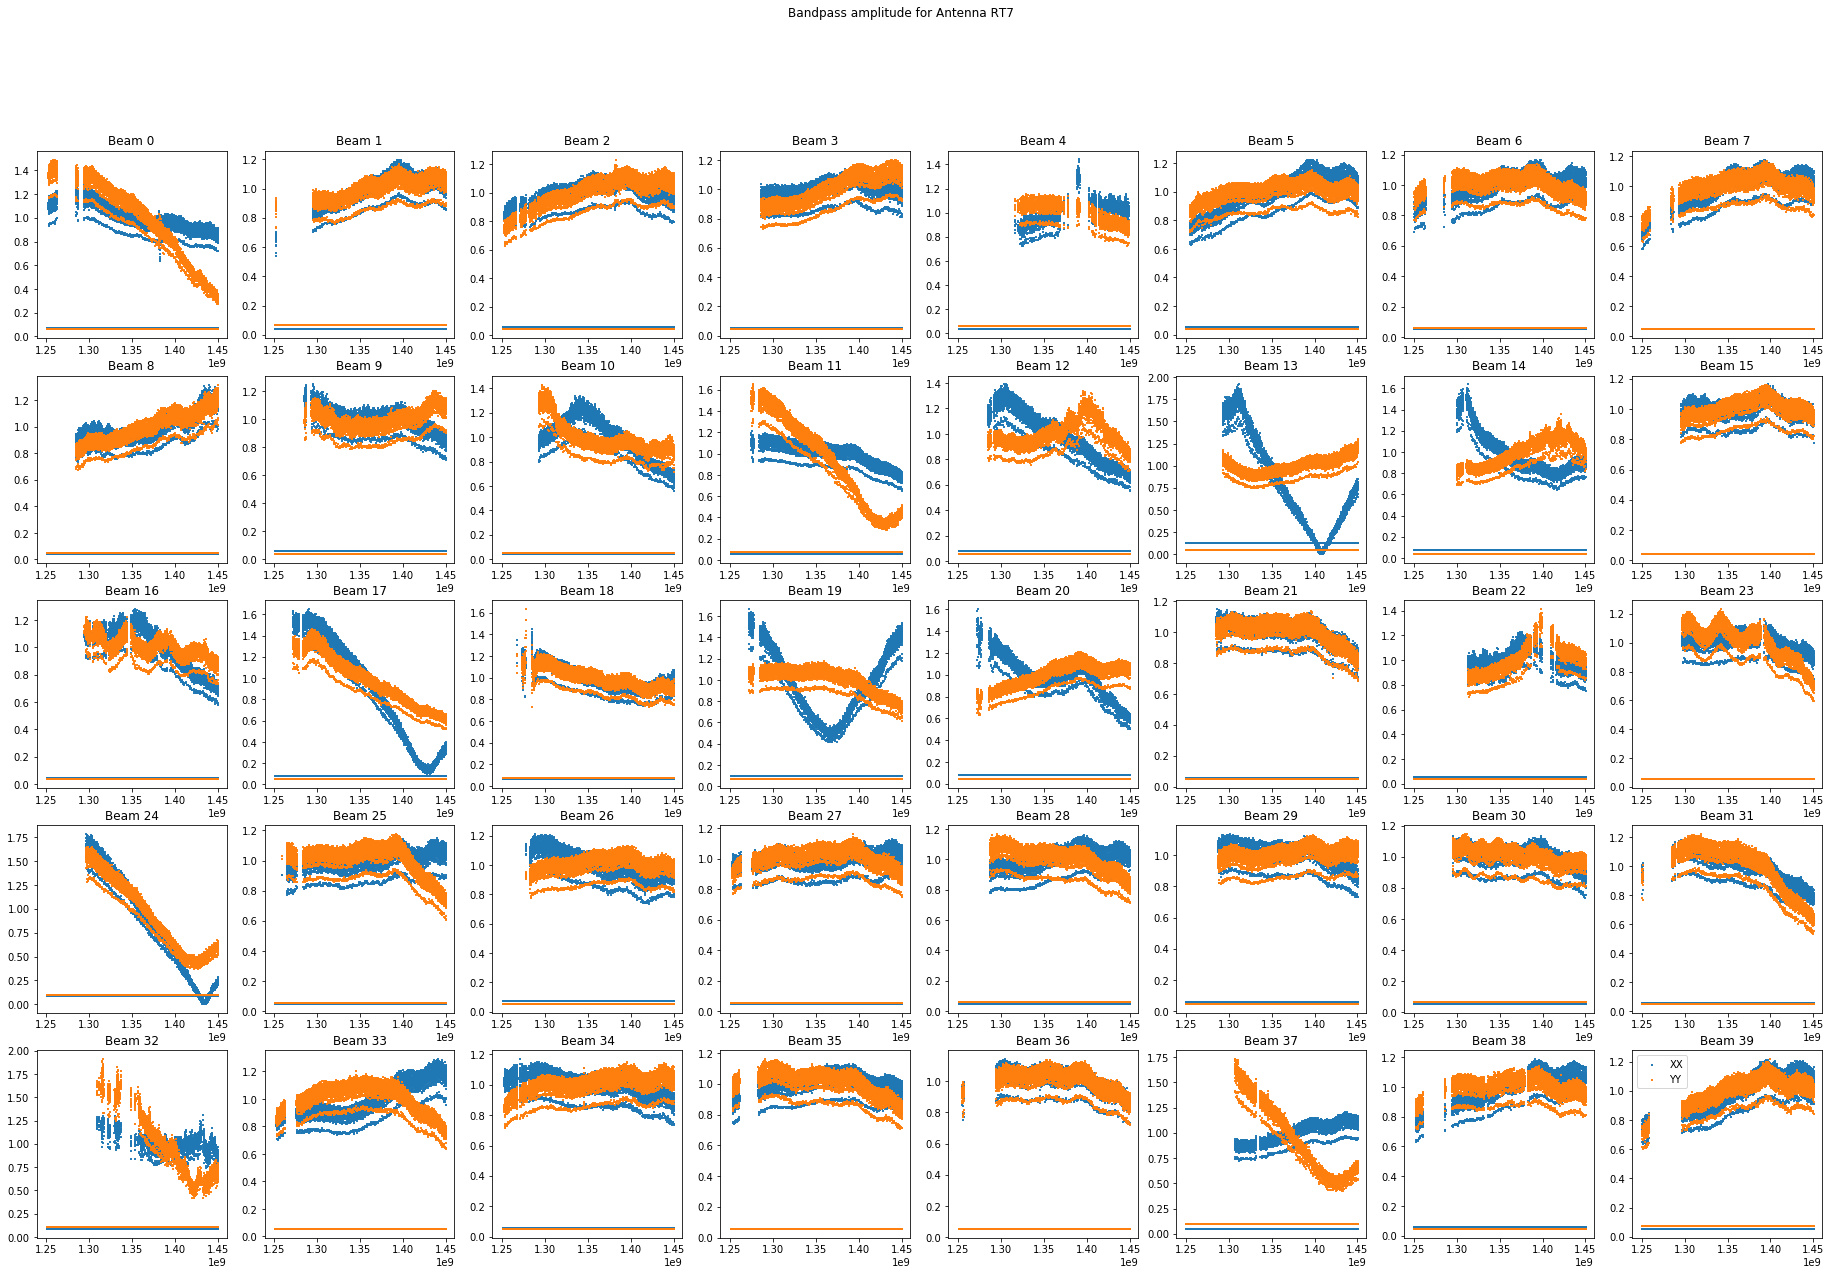

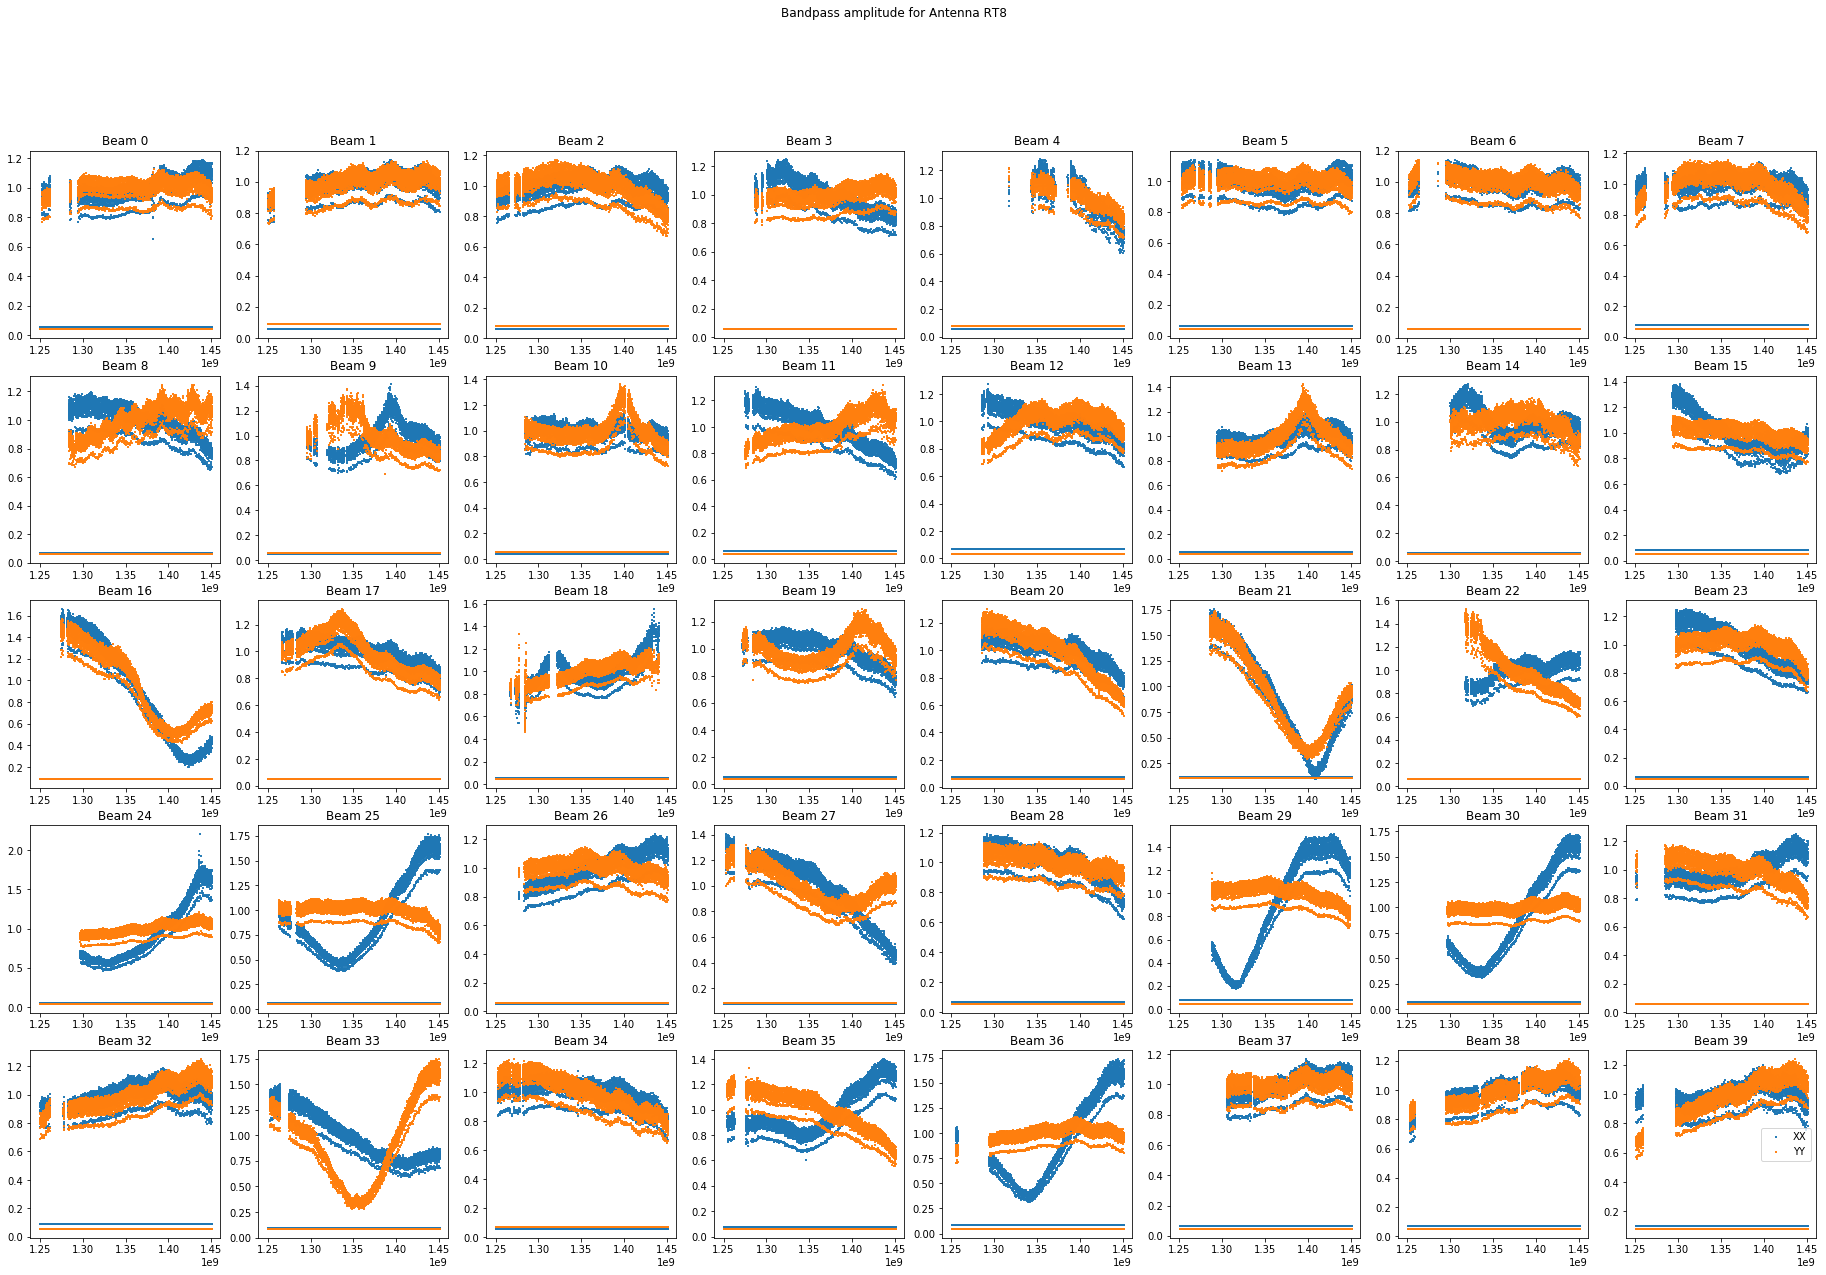

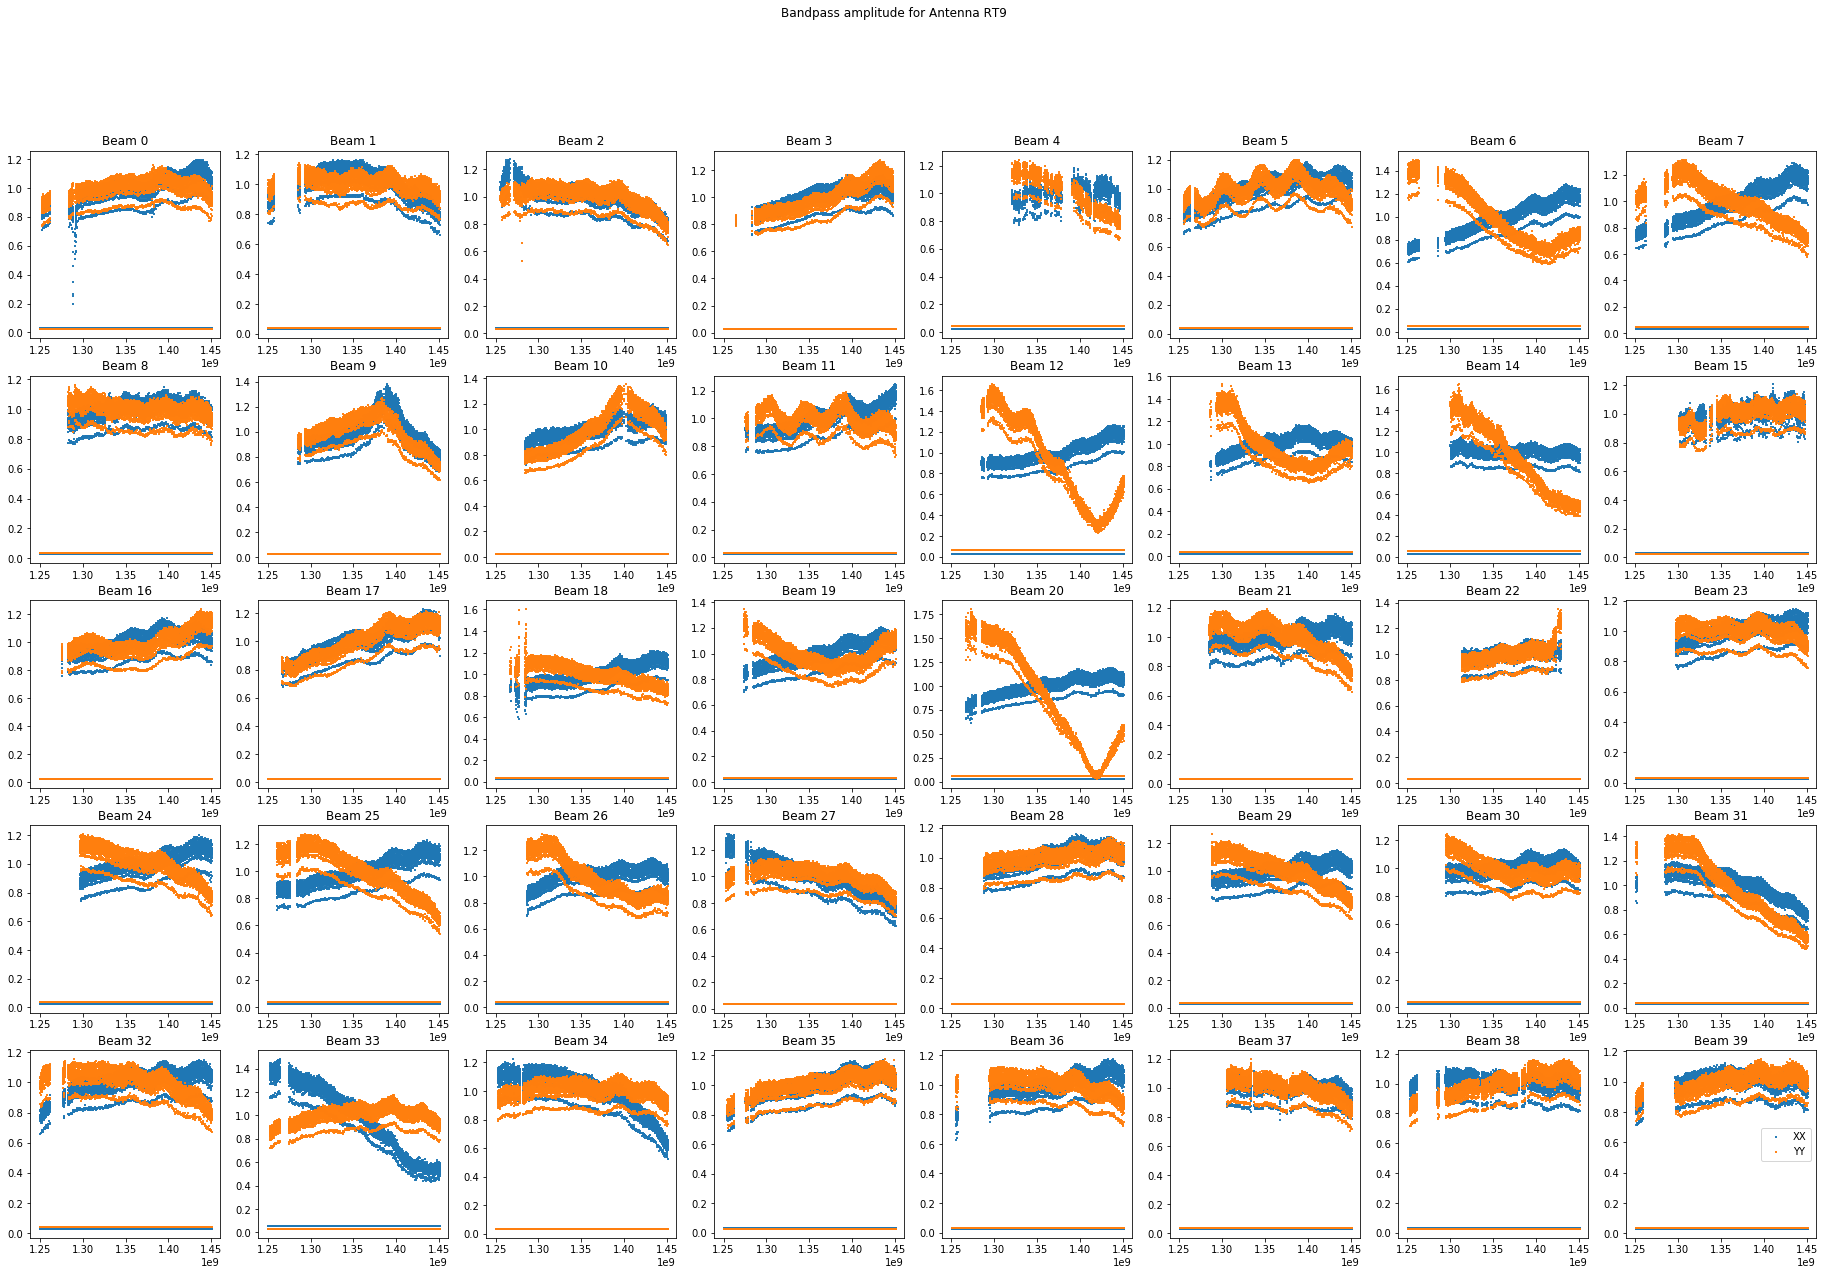

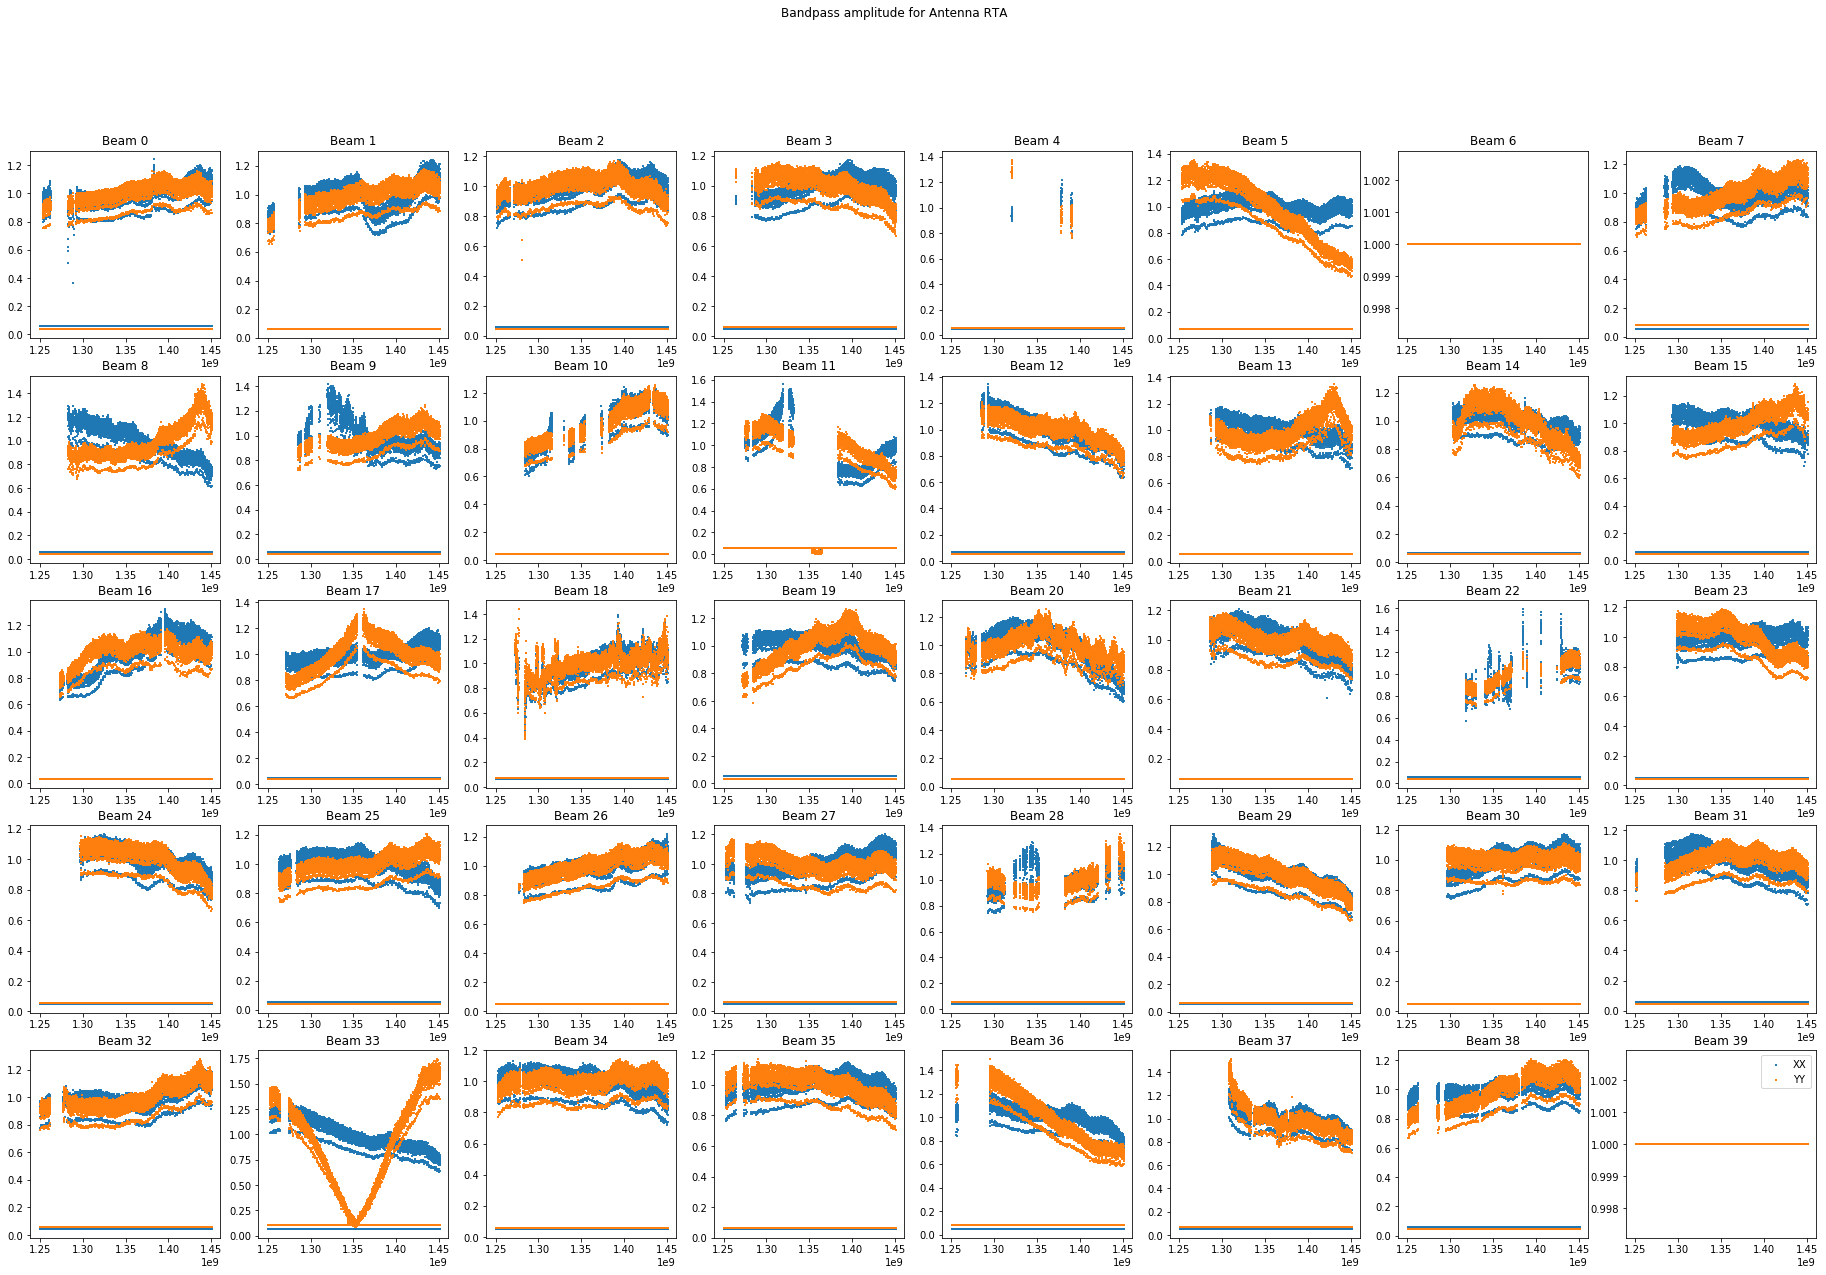

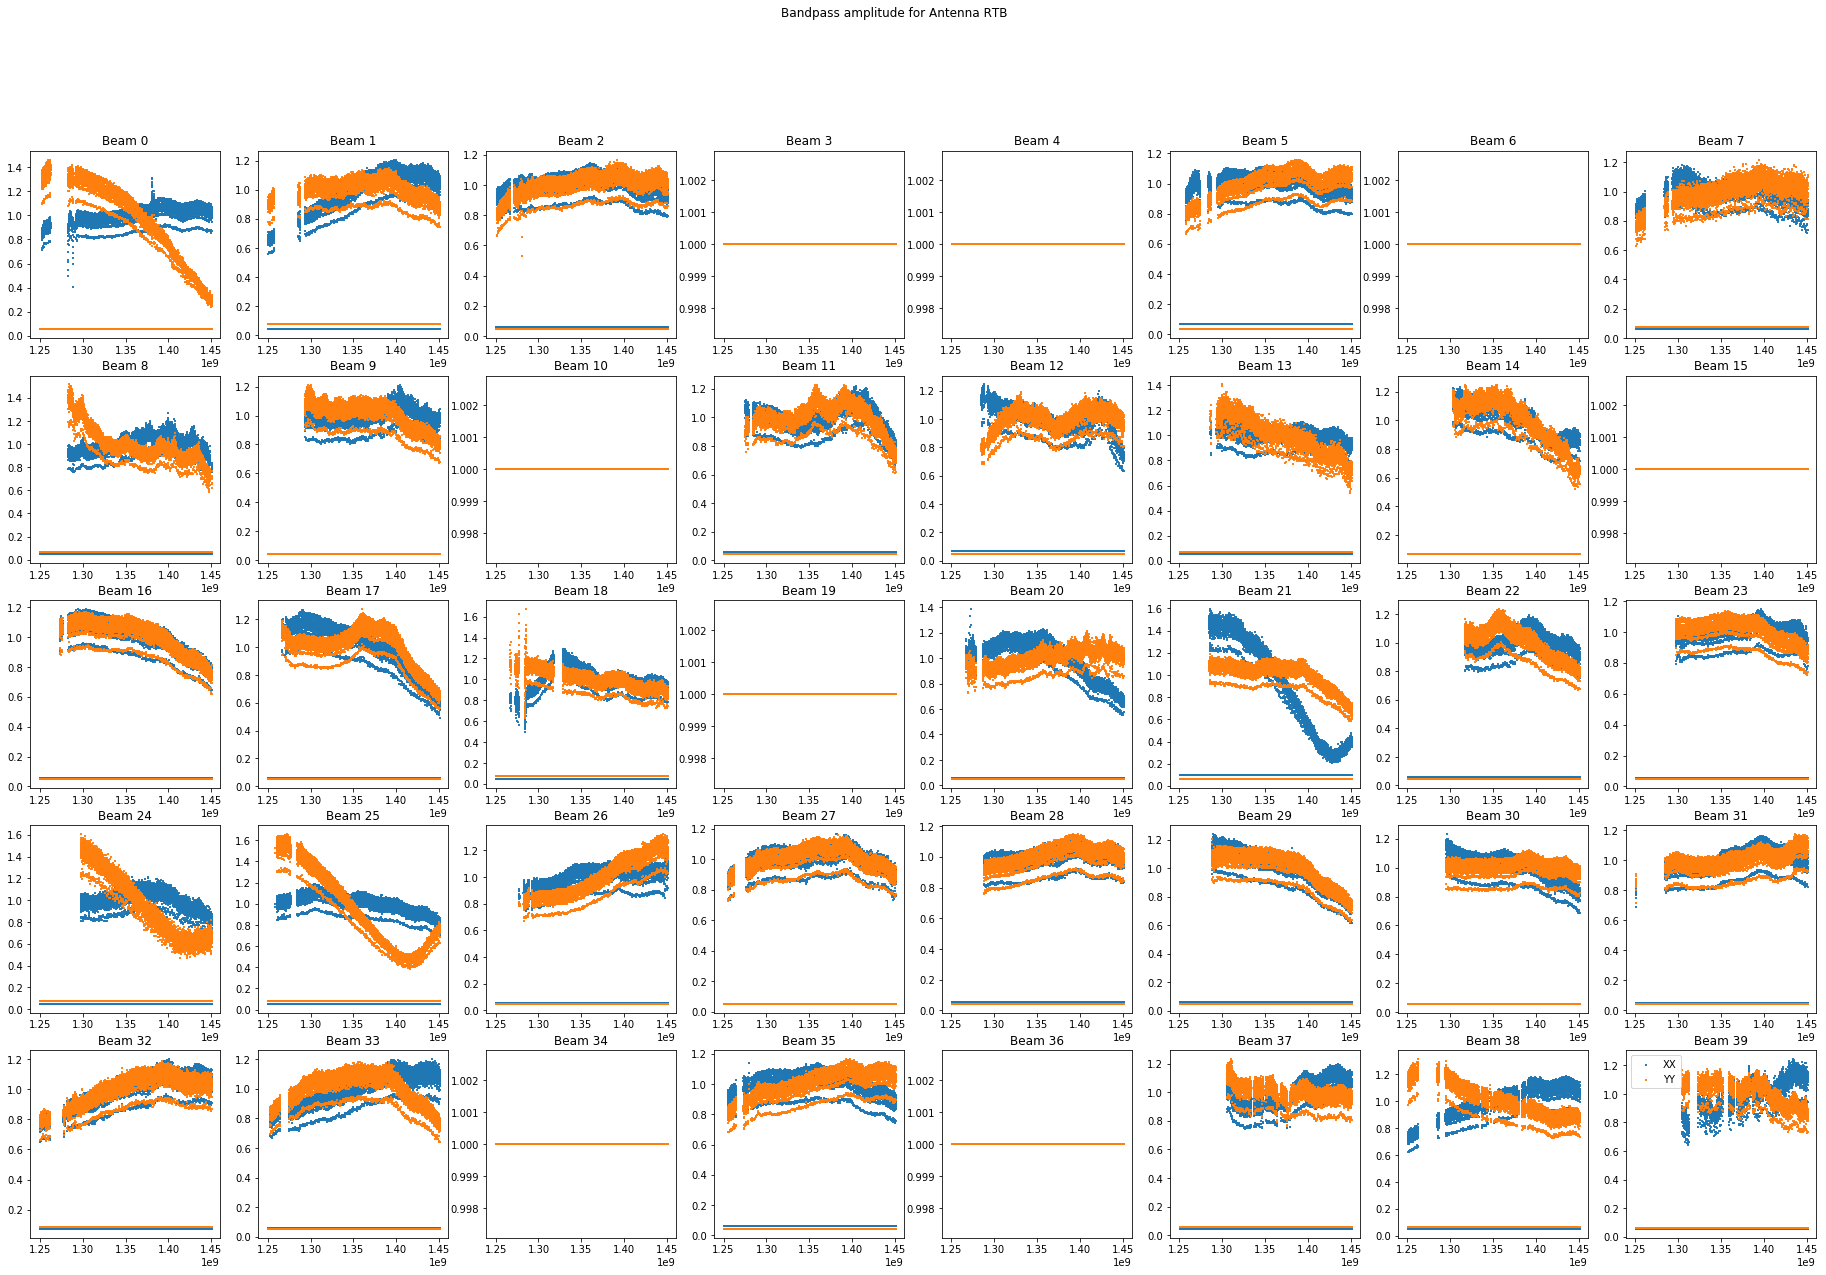

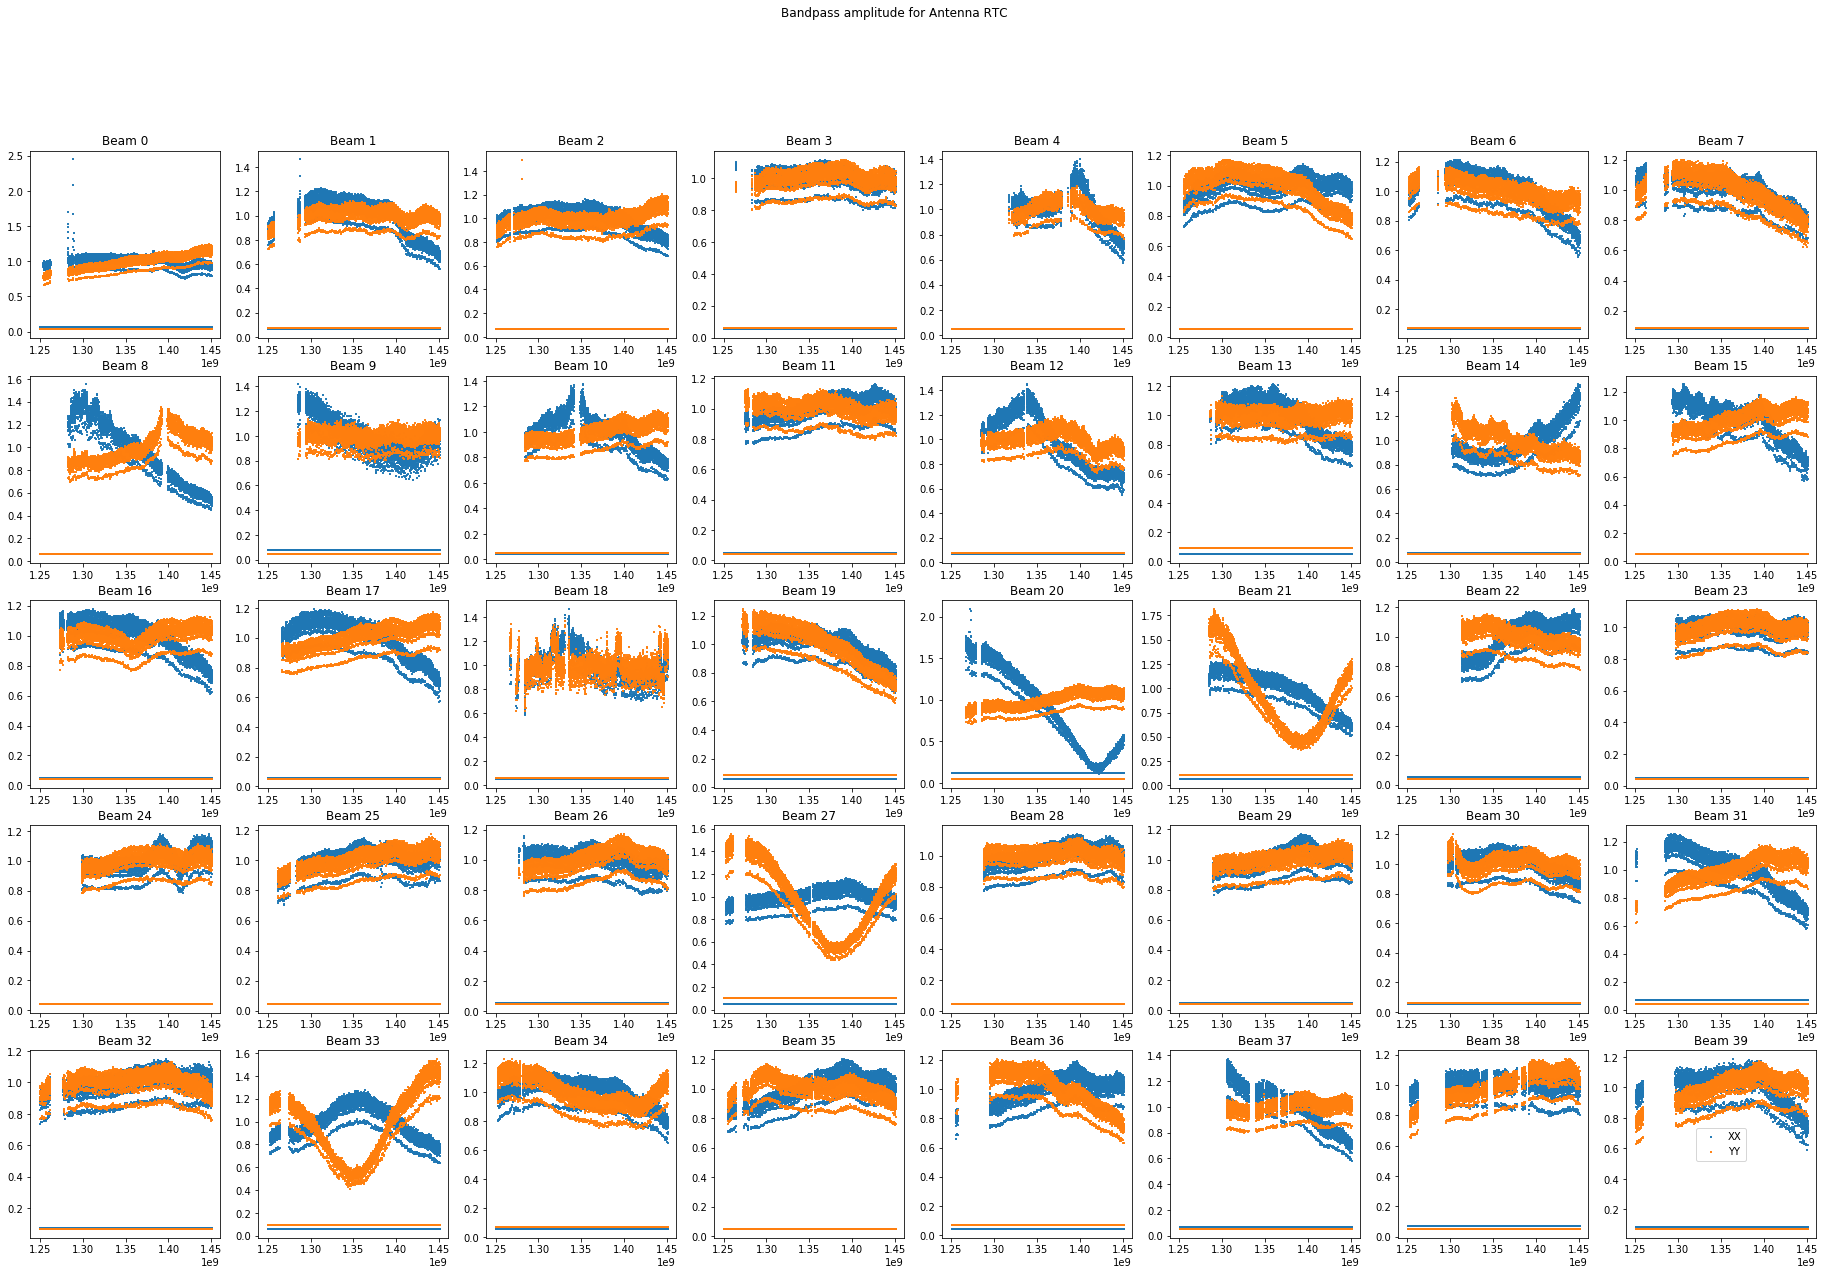

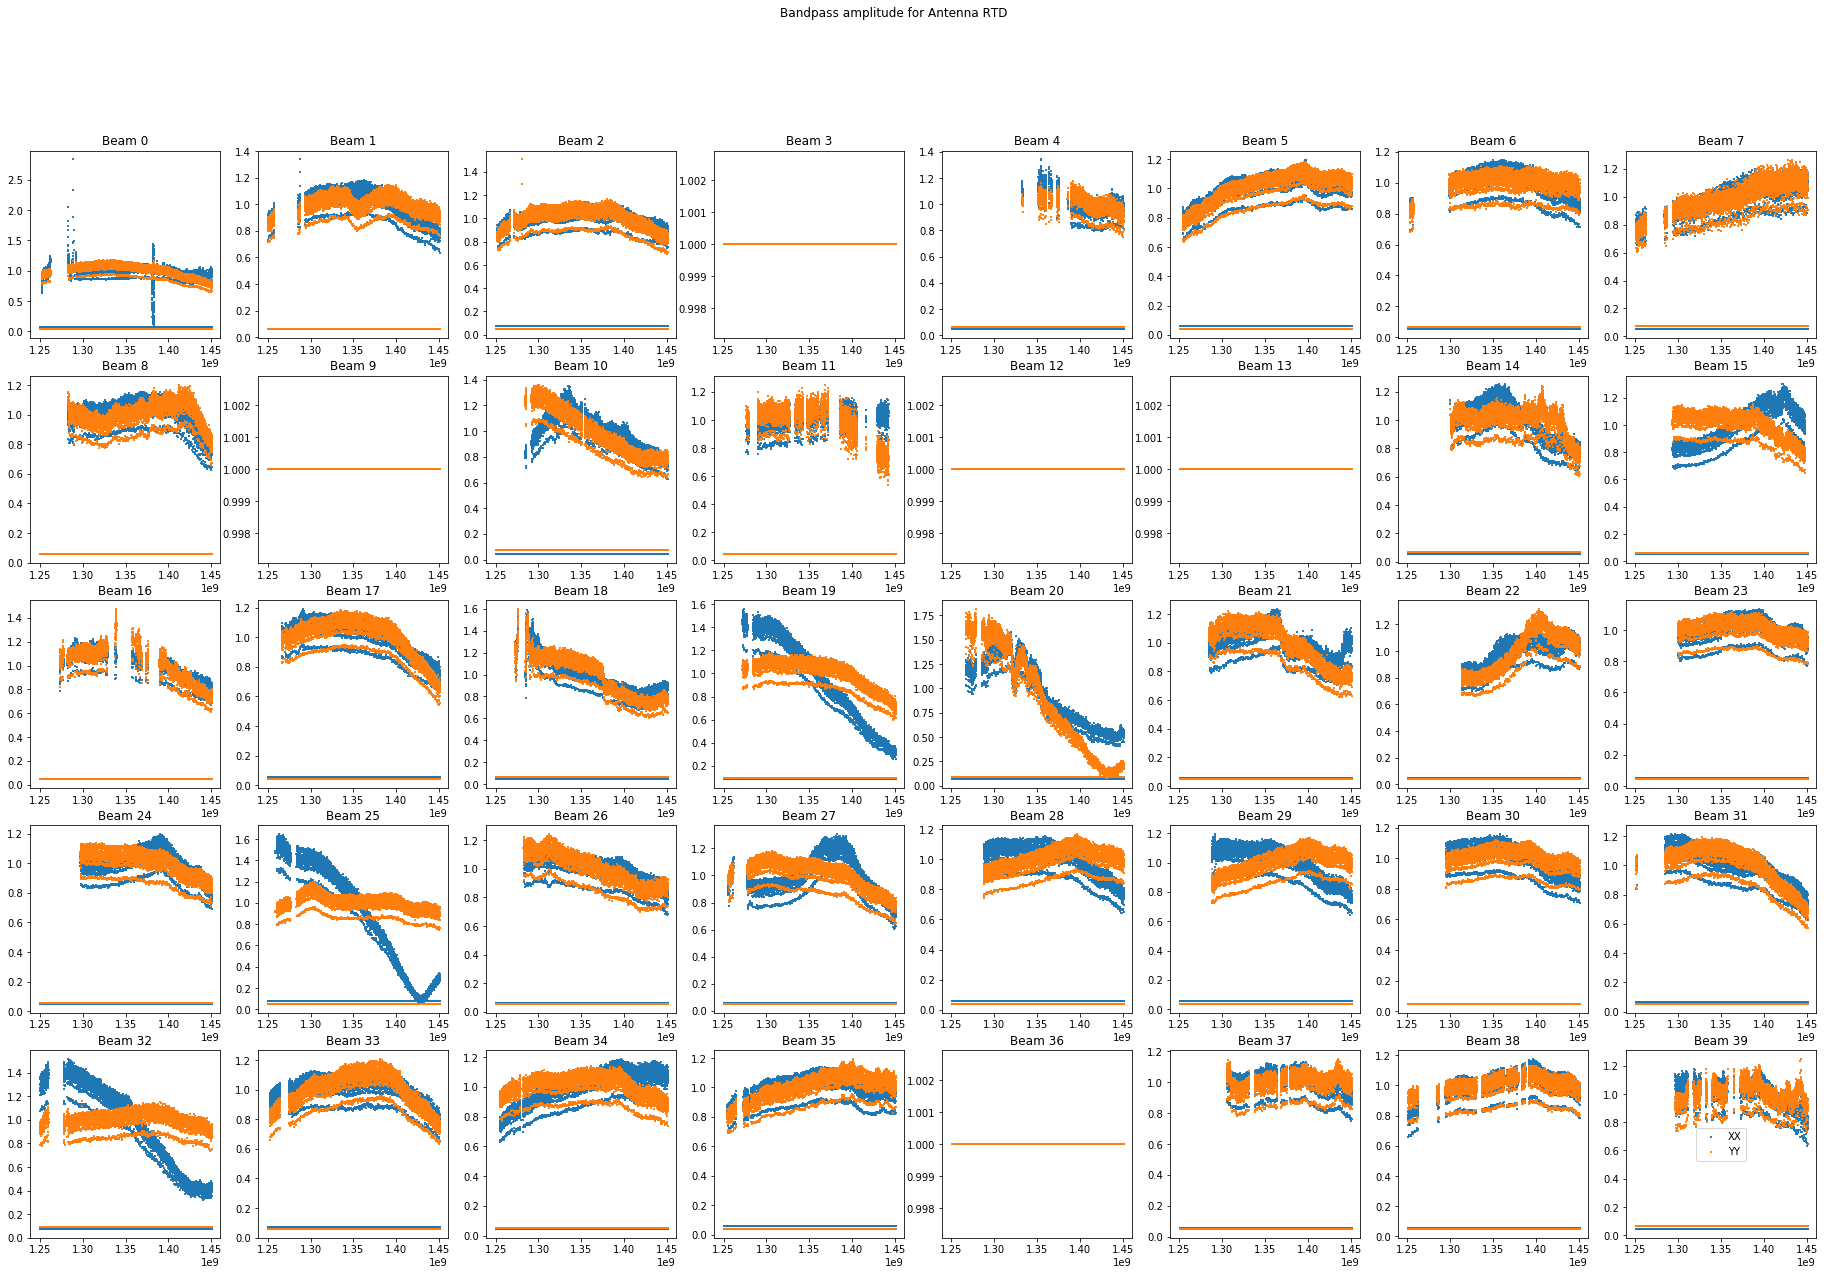

In [12]:
bp190221011.plot_amp()

## Plot calibrator model

This is a double-check that calibration is working properly

In [ ]:
#plot the model for scans
#this serves as a check that the source renaming and calibration were properly done
fig = cc.plot_compare_scan_model(scans,obsrecordfile,basedir,plotmode='amp',
                           pol=0,nx=3,plotsize=3,ymin=20,ymax=25)

plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_model_amp.png')

In [ ]:
#plot the bandpass solutions for scans
#can choose to plot amplitude or phase
#can choose to normalize to a reference or not
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
fig = cc.plot_compare_bp_beam(scans,obsrecordfile,basedir,norm=True,
                         refscan='181026063',plotmode='amp',pol=0,nx=3,ymin=0.5,ymax=1.5,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_bp_amp_norm.png')

In [ ]:
#plot the bandpass solutions for scans
#can choose to plot amplitude or phase
#can choose to normalize to a reference or not
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
fig = cc.plot_compare_bp_beam(scans,obsrecordfile,basedir,norm=False,
                         refscan='181026063',plotmode='amp',pol=0,nx=3,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_bp_amp.png')

In [ ]:
#plot bandpass phases

fig = cc.plot_compare_bp_beam(scans,obsrecordfile,basedir,norm=True,
                         refscan='181026063',plotmode='phase',pol=0,nx=3,ymin=-180,ymax=180,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_bp_phase_norm.png')

In [ ]:
#plot the gain solutions for scans
#can choose to plot amplitude or phase
#can choose to normalize to a reference or not
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
"""Also want to properly format & display times"""
fig = cc.plot_compare_gain_beam(scans,obsrecordfile,basedir,norm=False,
                         refscan='181026063',plotmode='amp',pol=0,nx=3,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_gain_amp.png')

In [ ]:
#plot gain phases
fig = cc.plot_compare_gain_beam(scans,obsrecordfile,basedir,norm=False,
                         refscan='181026063',plotmode='phase',pol=0,nx=3,ymin=-180,ymax=180,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_gain_phase.png')

In [ ]:
#plot the calibrated data for each scan
#can choose to plot amplitude or phase
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
fig = cc.plot_compare_calibrated_data_beam(scans,obsrecordfile,basedir,norm=False,
                                          refscan='181026063',plotmode='amp',pol=0,nx=3,plotsize=3,
                                          ymin=20,ymax=25)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_calibrated_amp.png')

In [ ]:
#plot the calibrated data for each scan
#can choose to plot amplitude or phase
#can choose polarization index

fig = cc.plot_compare_calibrated_data_beam(scans,obsrecordfile,basedir,norm=False,
                                          refscan='181026063',plotmode='phase',pol=0,nx=3,plotsize=3,
                                          ymin=10,ymax=-10)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_calibrated_phase.png')